In [121]:
import pandas as pd
import os

path = os.getcwd() +"\dataset\pubg\\train.csv"

data = pd.read_csv(path, index_col = False)

In [122]:
data.head(20)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,24,0,0,5,247.30,2,0,4,17,...,1,591.3,0,0.0000,0,0,782.40,4,1458,0.8571
1,1,440875,1,1,0,37.65,1,1,0,45,...,0,0.0,0,0.0000,0,0,119.60,3,1511,0.0400
2,2,878242,2,0,1,93.73,1,0,2,54,...,1,0.0,0,0.0000,0,0,3248.00,5,1583,0.7407
3,3,1319841,3,0,0,95.88,0,0,0,86,...,0,0.0,0,0.0000,0,0,21.49,1,1489,0.1146
4,4,1757883,4,0,1,0.00,0,0,1,58,...,0,0.0,0,0.0000,0,0,640.80,4,1475,0.5217
5,5,2200824,5,0,2,128.10,0,0,0,25,...,0,2221.0,0,0.0000,0,0,1016.00,4,1500,0.9368
6,6,2568717,6,1,0,130.30,0,0,0,28,...,0,721.7,0,0.0000,0,0,280.10,3,1495,0.3721
7,7,2612473,7,1,1,661.80,2,3,2,3,...,0,0.0,0,0.0000,0,0,2617.00,4,1479,1.0000
8,8,2656377,8,0,3,94.72,0,0,5,50,...,0,2963.0,0,28.9000,0,0,3139.00,5,1528,0.7037
9,9,2700597,9,0,0,137.60,0,0,0,81,...,0,0.0,0,0.0000,0,0,238.70,3,1500,0.0417


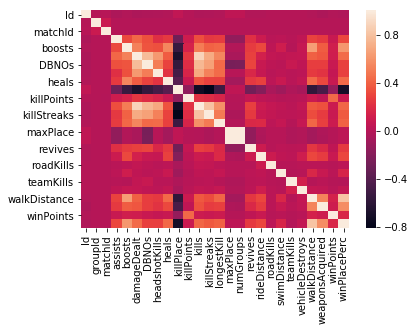

In [123]:
import seaborn as sns
%matplotlib inline

sns.heatmap(data.corr())

In [124]:
data.shape

(4357336, 26)

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4357336 entries, 0 to 4357335
Data columns (total 26 columns):
Id                 int64
groupId            int64
matchId            int64
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
maxPlace           int64
numGroups          int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(20)
memory usage: 864.3 MB


In [126]:
data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'maxPlace', 'numGroups', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

In [127]:
X = data[['assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'revives',
       'rideDistance', 'swimDistance',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints']]
Y = data['winPlacePerc']

In [128]:
from sklearn.linear_model import LinearRegression

In [129]:
model = LinearRegression()

In [130]:
model.fit(X, Y)

pred = model.predict(X)

In [131]:
from sklearn import metrics

print(metrics.mean_squared_error(Y, pred))

0.019121109307574217


In [132]:
path1 = os.getcwd() +"\dataset\pubg\\test.csv"

data_new = pd.read_csv(path1, index_col = False)

In [133]:
X_test = data_new[['assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'revives',
       'rideDistance', 'swimDistance',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints']]

In [134]:
Y_pred = model.predict(X_test)

In [135]:
sample = pd.DataFrame({"Id":list(data_new['Id']), "winPlacePerc":list(Y_pred)})

In [136]:
sample.head(10)

,Id,winPlacePerc
0,47734,0.401649
1,47735,0.500317
2,47736,0.194674
3,47737,0.249393
4,47738,0.288240
5,47739,0.075813
6,47740,0.348965
7,47741,0.228351
8,47742,0.744062
9,47743,0.318067


In [137]:
sample.to_csv('123456.csv', index=False)